In [275]:
import json
import pandas as pd
import numpy as np
import os
import cmasher as cmr
from collections import Counter, defaultdict
from mplsoccer import Pitch, Sbopen, VerticalPitch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# All competitions

In [2]:
# Load competitions data from JSON file
file_path = './data/competitions.json'

with open(file_path, 'r') as file:
    competitions_data = json.load(file)

# Display basic information about competitions
print("Number of competitions:", len(competitions_data))

competitions_df = pd.DataFrame(competitions_data)
competitions_df = competitions_df[competitions_df["competition_gender"] == "male"]

Number of competitions: 70


In [3]:
competition_id = 16 ### CHAMPIONS LEAGUE
season_id = 1 ### SAISON 2017-2018

# All Games

In [9]:
# Path to the matches folder
matches_folder = f'./data/matches/16'

# List to store individual match DataFrames
match_dfs = []
matches_df = pd.DataFrame()

# Loop through each file in the matches folder
for file_name in os.listdir(matches_folder):
    file_path = os.path.join(matches_folder, file_name)
    
    # Load match data from JSON file
    with open(file_path, 'r') as file:
        match_data = json.load(file)

        # Create a DataFrame from each match data and append to the list
        match_df = pd.DataFrame(match_data)
        match_dfs.append(match_df)

# Concatenate all match DataFrames into a single DataFrame
matches_df = pd.concat(match_dfs, ignore_index=True)

# Display the DataFrame
matches_df
 

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,metadata,match_week,competition_stage,stadium,referee
0,18245,2018-05-26,20:45:00.000,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 1, 'season_name': '2017/2018'}","{'home_team_id': 220, 'home_team_name': 'Real ...","{'away_team_id': 24, 'away_team_name': 'Liverp...",3,1,available,scheduled,2021-01-23T21:55:30.425330,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",7,"{'id': 26, 'name': 'Final'}","{'id': 4222, 'name': 'NSK Olimpiyskyi', 'count...","{'id': 727, 'name': 'Milorad MaÅ¾iÄ‡', 'countr..."
1,18244,2017-06-03,20:45:00.000,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 2, 'season_name': '2016/2017'}","{'home_team_id': 224, 'home_team_name': 'Juven...","{'away_team_id': 220, 'away_team_name': 'Real ...",1,4,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,{'data_version': '1.0.3'},7,"{'id': 26, 'name': 'Final'}","{'id': 113891, 'name': 'Principality Stadium',...","{'id': 186, 'name': 'Felix Brych', 'country': ..."
2,18235,2010-05-22,20:45:00.000,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 21, 'season_name': '2009/2010'}","{'home_team_id': 169, 'home_team_name': 'Bayer...","{'away_team_id': 238, 'away_team_name': 'Inter...",0,2,available,scheduled,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,{'data_version': '1.0.3'},1,"{'id': 26, 'name': 'Final'}","{'id': 353, 'name': 'Estadio Santiago BernabÃ©...","{'id': 708, 'name': 'Howard Webb', 'country': ..."
3,18236,2011-05-28,20:45:00.000,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 22, 'season_name': '2010/2011'}","{'home_team_id': 217, 'home_team_name': 'Barce...","{'away_team_id': 39, 'away_team_name': 'Manche...",3,1,available,scheduled,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,{'data_version': '1.0.3'},1,"{'id': 26, 'name': 'Final'}","{'id': 4666, 'name': 'Wembley Stadium', 'count...","{'id': 449, 'name': 'Viktor Kassai', 'country'..."
4,18237,2012-05-19,20:45:00.000,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 23, 'season_name': '2011/2012'}","{'home_team_id': 169, 'home_team_name': 'Bayer...","{'away_team_id': 33, 'away_team_name': 'Chelse...",1,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,{'data_version': '1.0.3'},1,"{'id': 26, 'name': 'Final'}","{'id': 4867, 'name': 'Allianz Arena', 'country...","{'id': 717, 'name': 'Pedro ProenÃ§a', 'country..."
5,18240,2013-05-25,20:45:00.000,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 24, 'season_name': '2012/2013'}","{'home_team_id': 180, 'home_team_name': 'Borus...","{'away_team_id': 169, 'away_team_name': 'Bayer...",1,2,available,scheduled,2021-07-10T13:41:45.751,2021-06-13T16:17:31.694,{'data_version': '1.0.3'},1,"{'id': 26, 'name': 'Final'}","{'id': 4666, 'name': 'Wembley Stadium', 'count...","{'id': 419, 'name': 'Nicola Rizzoli', 'country..."
6,18241,2014-05-24,20:45:00.000,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 25, 'season_name': '2013/2014'}","{'home_team_id': 220, 'home_team_name': 'Real ...","{'away_team_id': 212, 'away_team_name': 'AtlÃ©...",4,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,{'data_version': '1.0.3'},1,"{'id': 26, 'name': 'Final'}","{'id': 611, 'name': 'EstÃ¡dio do Sport Lisboa ...","{'id': 287, 'name': 'BjÃ¶rn Kuipers', 'country..."
7,18242,2015-06-06,20:45:00.000,"{'competition_id': 16, 'country_name': 'Europe...","{'season_id': 26, 'season_name': '2014/2015'}","{'home_team_id': 224, 'home_team_name': 'Juven...","{'away_team_id': 217, 'away_team_name': 'Barce...",1,3,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,{'data_version': '1.0.3'},1,"{'id': 26, 'name': 'Final'}","{'id': 367, 'name': 'Olympiastadion Berlin', '...","{'id': 581, 'name': 'CÃ¼neyt Ã‡akÎ¹r', 'countr..."
8,18243,2016-05-28,20:45:00.00

# Events of Game

In [20]:
# Path to the events folder
events_folder = './data/events/'

# Match ID to filter
desired_match_id = 18245

# List to store event DataFrames
event_dfs = []

# Loop through each file in the events folder
filename = f'{desired_match_id}.json'
file_path = os.path.join(events_folder, filename)
with open(file_path, 'r') as file:
    event_data = json.load(file)
event_df = pd.DataFrame(event_data)
print(event_df.columns)    
print(len(event_df))

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'duration',
       'tactics', 'related_events', 'player', 'position', 'location', 'pass',
       'carry', 'ball_receipt', 'counterpress', 'under_pressure', 'clearance',
       'foul_won', 'off_camera', 'duel', 'dribble', 'out', 'shot',
       'goalkeeper', 'interception', 'ball_recovery', '50_50', 'substitution',
       'foul_committed', 'block', 'injury_stoppage'],
      dtype='object')
3497


In [25]:
event_df["type"].value_counts()

type
{'id': 30, 'name': 'Pass'}               1033
{'id': 42, 'name': 'Ball Receipt*'}       978
{'id': 43, 'name': 'Carry'}               796
{'id': 17, 'name': 'Pressure'}            226
{'id': 2, 'name': 'Ball Recovery'}         95
{'id': 4, 'name': 'Duel'}                  56
{'id': 6, 'name': 'Block'}                 36
{'id': 9, 'name': 'Clearance'}             33
{'id': 23, 'name': 'Goal Keeper'}          32
{'id': 14, 'name': 'Dribble'}              29
{'id': 16, 'name': 'Shot'}                 28
{'id': 3, 'name': 'Dispossessed'}          28
{'id': 22, 'name': 'Foul Committed'}       25
{'id': 21, 'name': 'Foul Won'}             23
{'id': 39, 'name': 'Dribbled Past'}        20
{'id': 38, 'name': 'Miscontrol'}           16
{'id': 10, 'name': 'Interception'}         11
{'id': 40, 'name': 'Injury Stoppage'}       9
{'id': 19, 'name': 'Substitution'}          5
{'id': 34, 'name': 'Half End'}              4
{'id': 18, 'name': 'Half Start'}            4
{'id': 36, 'name': 'Tactical 

# Line-Ups

In [286]:
event_df

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,out,shot,goalkeeper,interception,ball_recovery,50_50,substitution,foul_committed,block,injury_stoppage
0,5eee3ffd-f0c0-4532-868b-4a66cbf20cb8,1,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 220, 'name': 'Real Madrid'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,eaa65a92-02d3-4375-b2b7-7c2f679a620c,2,1,00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 220, 'name': 'Real Madrid'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9c82d2e5-ebba-4825-b7f9-b11b04433ed8,3,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 220, 'name': 'Real Madrid'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b791047a-3eea-452f-b3a9-212bd40cd7cb,4,1,00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 220, 'name': 'Real Madrid'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25be91a5-a084-42cb-8cc1-a0fe7b0f52f9,5,1,00:00:00.371,0,0,"{'id': 30, 'name': 'Pass'}",2,"{'id': 24, 'name': 'Liverpool'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,b4258521-d4ec-466d-a90c-e4522692a45b,3493,2,00:47:30.959,92,30,"{'id': 30, 'name': 'Pass'}",164,"{'id': 220, 'name': 'Real Madrid'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3493,37f51448-ebd1-4d67-8d9e-fa4b450111b2,3494,2,00:47:33.052,92,33,"{'id': 42, 'name': 'Ball Receipt*'}",164,"{'id': 220, 'name': 'Real Madrid'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3494,e9f7bb50-f4fc-45aa-87d3-20bbe9ebd32f,3495,2,00:47:39.157,92,39,"{'id': 40, 'name': 'Injury Stoppage'}",164,"{'id': 220, 'name': 'Real Madrid'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'in_chain': True}
3495,ce7d446a-e8bf-4631-bcf5-2bd323ba251e,3496,2,00:48:02.893,93,2,"{'id': 34, 'name': 'Half End'}",164,"{'id': 220, 'name': 'Real Madrid'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
event_df[event_df["type"] == {'id': 35, 'name': 'Starting XI'}]["team"].iloc[0].get('name')

'Real Madrid'

Text(1.0, 1.0, 'Liverpool Lineup - 433')

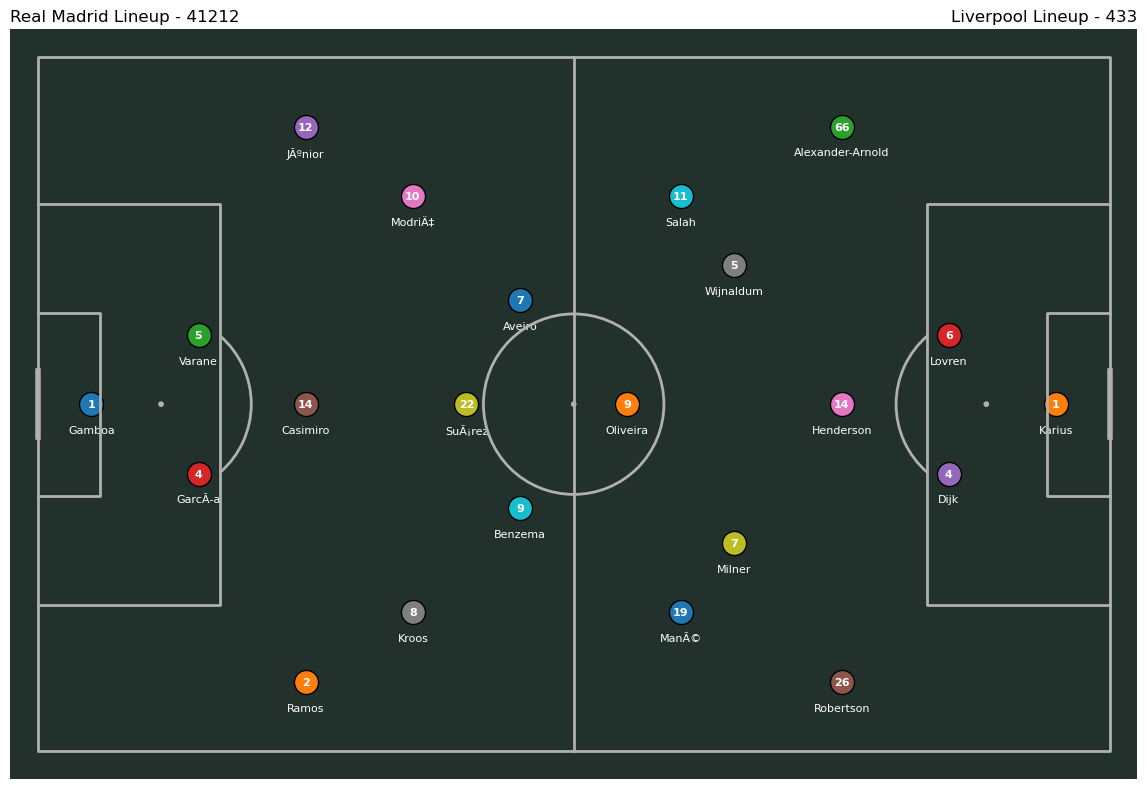

In [124]:
# Player positions on the pitch (x, y)
positions = {
    'Goalkeeper': (5, 50),
    'Right Back': (25, 10),
    'Right Center Back': (15, 60),
    'Left Center Back': (15, 40),
    'Left Back': (25, 90),
    'Center Defensive Midfield': (25, 50),
    'Right Center Midfield': (35, 80),
    'Left Center Midfield': (35, 20),
    'Center Attacking Midfield': (40, 50),
    'Right Center Forward': (45, 35),
    'Left Center Forward': (45, 65)
}

team_data = event_df[event_df["type"] == {'id': 35, 'name': 'Starting XI'}]["tactics"].iloc[0]
team_name_first = event_df[event_df["type"] == {'id': 35, 'name': 'Starting XI'}]["team"].iloc[0].get('name')

# Player positions on the pitch (x, y) for the second team
positions_second_team = {
    'Goalkeeper': (95, 50),
    'Left Back': (75, 10),
    'Right Center Back': (85, 60),
    'Left Center Back': (85, 40),
    'Right Back': (75, 90),
    'Center Defensive Midfield': (75, 50),
    'Right Center Midfield': (65, 70),
    'Left Center Midfield': (65, 30),
    'Right Wing': (60, 80),
    'Left Wing': (60, 20),
    'Center Forward': (55, 50)
}

team_data_second = event_df[event_df["type"] == {'id': 35, 'name': 'Starting XI'}]["tactics"].iloc[1]

team_name_second = event_df[event_df["type"] == {'id': 35, 'name': 'Starting XI'}]["team"].iloc[1].get('name')


p = Pitch(pitch_type='opta', pitch_color='#22312b', line_zorder=50 )
fig, ax = p.draw(figsize=(12,8))

# Plotting players
for player in team_data['lineup']:
    player_name = player['player']['name']
    position_name = player['position']['name']
    jersey_number = player['jersey_number']
    
    # Get player position on the pitch
    x, y = positions[position_name]
    
    plt.scatter(x, y, s=300, edgecolors='black', zorder=2)
    #plt.text(x, y, f"{jersey_number}\n{player_name}", ha='center', va='center', fontsize=8, fontweight='bold', color='white')
    plt.text(x, y, f"{jersey_number}", ha='center', va='center', fontsize=8, fontweight='bold', color='white')
    plt.text(x, y - 3, f"{player_name.split()[-1]}", ha='center', va='top', fontsize=8, color='white')

    
for player in team_data_second['lineup']:
    player_name = player['player']['name']
    position_name = player['position']['name']
    jersey_number = player['jersey_number']
    
    # Get player position on the pitch for the second team
    x, y = positions_second_team[position_name]
    
    plt.scatter(x, y, s=300, edgecolors='black', zorder=2)
    plt.text(x, y, f"{jersey_number}", ha='center', va='center', fontsize=8, fontweight='bold', color='white')
    plt.text(x, y - 3, f"{player_name.split()[-1]}", ha='center', va='top', fontsize=8, color='white')

plt.title(f'{team_name_first} Lineup - {team_data["formation"]}', loc="left")
plt.title(f'{team_name_second} Lineup - {team_data_second["formation"]}', loc="right")





# Heatmaps

In [166]:
all_passes = event_df[event_df["type"] == {'id': 30, 'name': 'Pass'}]

In [188]:
rma_passes = all_passes[(all_passes.get('team') == {'id': 220, 'name': 'Real Madrid'})]
rma_passes = rma_passes[(rma_passes.get('possession_team') == {'id': 220, 'name': 'Real Madrid'})]

In [192]:
rma_passes['passer'] = rma_passes['player'].apply(lambda x: x['name'])
rma_passes['receiver'] = rma_passes['pass'].apply(lambda x: x.get('recipient', {}).get('name'))

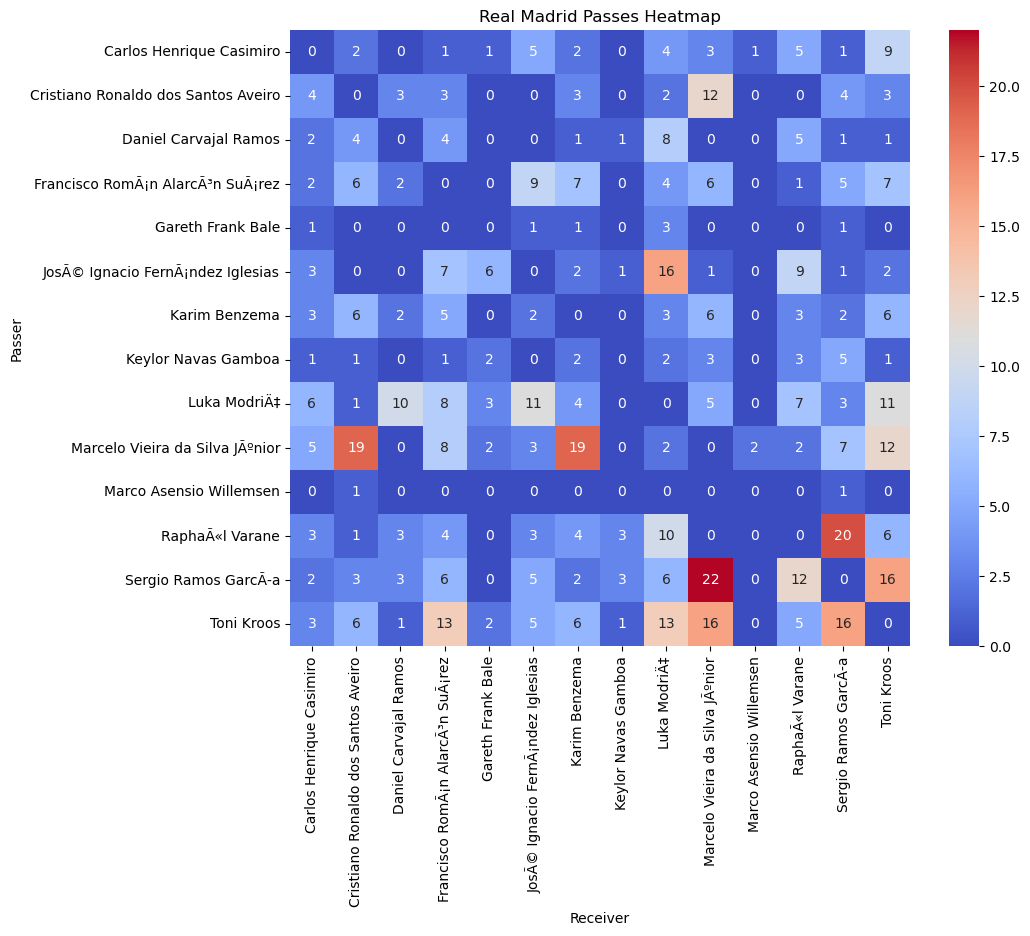

In [199]:
pass_counts = rma_passes.groupby(['passer', 'receiver']).size().reset_index(name='pass_count')
heatmap_data = pd.crosstab(pass_counts['passer'], pass_counts['receiver'], values=pass_counts['pass_count'], aggfunc='sum').fillna(0)

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', cbar=True)
plt.title('Real Madrid Passes Heatmap')
plt.xlabel('Receiver')
plt.ylabel('Passer')
plt.show()

In [208]:
rma_passes["x"] = rma_passes["location"].apply(lambda x: x[0])
rma_passes["y"] = rma_passes["location"].apply(lambda x: x[1])
rma_passes["end_x"] = rma_passes["end_location"].apply(lambda x: x[0])
rma_passes["end_y"] = rma_passes["end_location"].apply(lambda x: x[1])

In [210]:
df_pass = rma_passes

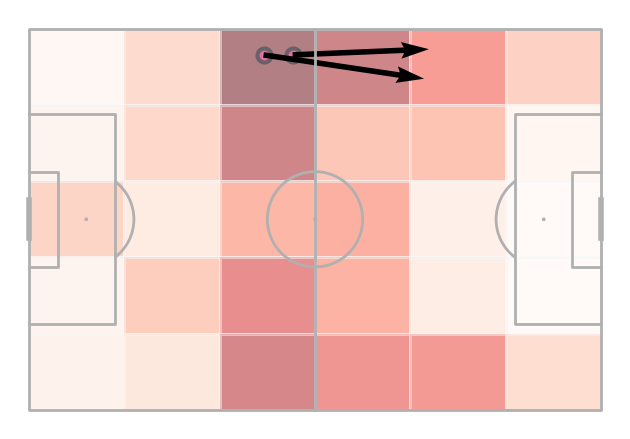

In [252]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=50 )
fig, ax = pitch.draw()
bin_statistic = pitch.bin_statistic(df_pass.x, df_pass.y, bins=(6, 5))
bin_statistic_end = pitch.bin_statistic(df_pass.end_x, df_pass.end_y, bins=(6, 5))

# let's get a mask for all passes that started in one grid cell and ended in another
mask_start = np.logical_and(bin_statistic['binnumber'][0] == 2,  # xs 5th box from left (zero indexed)
                            bin_statistic['binnumber'][1] == 0)  # ys 2nd from bottom (zero indexed)
mask_end = np.logical_and(bin_statistic_end['binnumber'][0] == 4,  # xs 6th box from left (zero indexed)
                          bin_statistic_end['binnumber'][1] == 0)  # ys 3rd box from bottom (zero indexed)
mask = np.logical_and(mask_start, mask_end)

# plot the passes that started in one grid cell and ended in another
pitch.scatter(df_pass.x[mask], df_pass.y[mask], ax=ax, fc='hotpink',
              marker='o', s=100, ec='darkslategrey', lw=3, alpha=0.6, zorder=4)
pitch.arrows(df_pass.x[mask], df_pass.y[mask], df_pass.end_x[mask], df_pass.end_y[mask],
             ax=ax, zorder=10, color='black')

# plot all of the starting locations as a heatmap
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9', alpha=0.5)
plt.show()

## Pressure Heatmaps

In [255]:
event_df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'duration',
       'tactics', 'related_events', 'player', 'position', 'location', 'pass',
       'carry', 'ball_receipt', 'counterpress', 'under_pressure', 'clearance',
       'foul_won', 'off_camera', 'duel', 'dribble', 'out', 'shot',
       'goalkeeper', 'interception', 'ball_recovery', '50_50', 'substitution',
       'foul_committed', 'block', 'injury_stoppage'],
      dtype='object')

In [263]:
press = event_df[(event_df["type"] == {'id': 17, 'name': 'Pressure'}) & (event_df["team"] == {'id': 220, 'name': 'Real Madrid'})]

In [267]:
press["x"] = press["location"].apply(lambda x: x[0])
press["y"] = press["location"].apply(lambda x: x[1])

C:\Users\Anass\AppData\Local\Temp\ipykernel_33852\183473777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press["x"] = press["location"].apply(lambda x: x[0])
C:\Users\Anass\AppData\Local\Temp\ipykernel_33852\183473777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press["y"] = press["location"].apply(lambda x: x[1])


In [276]:
cmap_dict = cmr.cm.cmap_cd
all_cmap_dict = {}
for cmap_type_key in cmap_dict:
    for key, cmap in cmap_dict[cmap_type_key].items():
        if key[-2:] != '_r':
            all_cmap_dict[key] = cmap

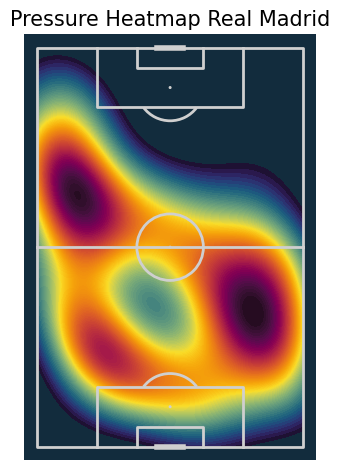

In [285]:
pitch = VerticalPitch(line_color='#cfcfcf', line_zorder=2, pitch_color='#122c3d')
fix, ax = pitch.draw()
cmap_name = "pride"
cmap = all_cmap_dict[cmap_name]
kdeplot = pitch.kdeplot(press.x, press.y, ax=ax, cmap=cmap, fill=True, levels=100)
ax_title = ax.set_title("Pressure Heatmap Real Madrid", fontsize=15)

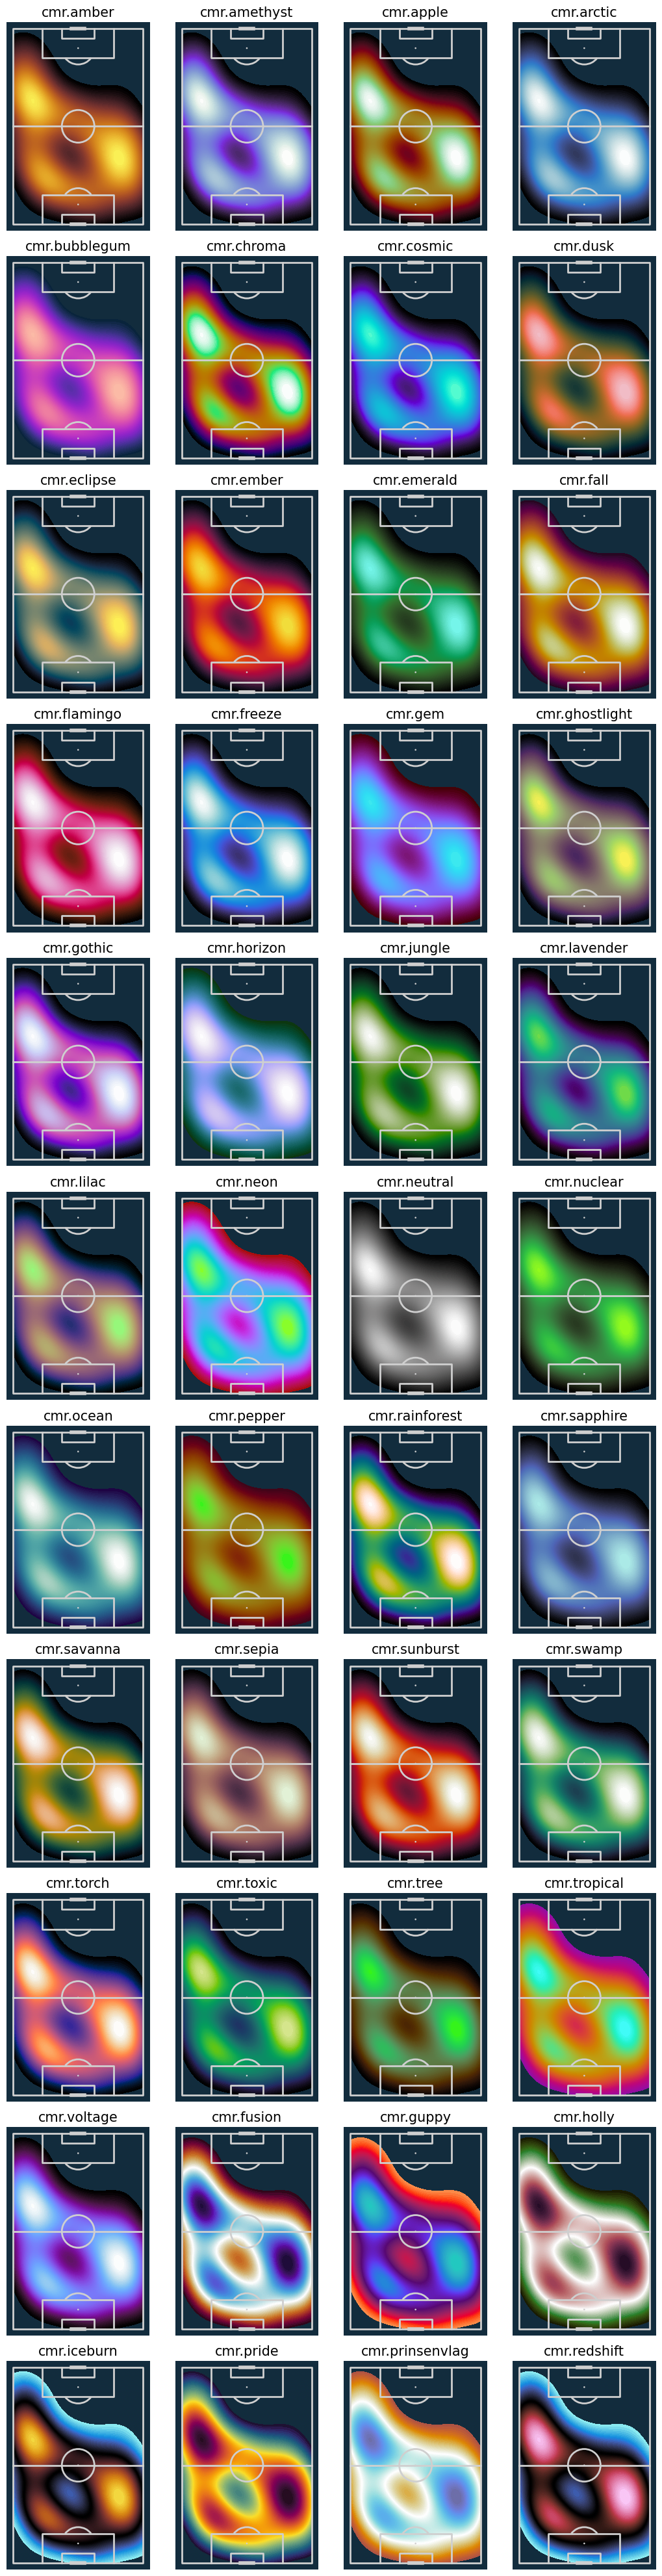

In [278]:
pitch = VerticalPitch(line_color='#cfcfcf', line_zorder=2, pitch_color='#122c3d')
fig, axs = pitch.grid(nrows=11, ncols=4, space=0.1, figheight=40,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)
cmap_names = list(all_cmap_dict.keys())
for idx, ax in enumerate(axs.flat):
    cmap_name = f'cmr.{cmap_names[idx]}'
    cmap = all_cmap_dict[cmap_names[idx]]
    kdeplot = pitch.kdeplot(press.x, press.y, ax=ax, cmap=cmap, fill=True, levels=100)
    ax_title = ax.set_title(cmap_name, fontsize=15)

# Draft

In [24]:
# Dictionary to store counts of different event types
event_type_counts = defaultdict(int)

# Loop through all events and count the occurrences of each event type
for event in event_data:
    event_type = event.get('type', {}).get('name')
    if event_type:
        event_type_counts[event_type] += 1

# Print the counts of different event types
for event_type, count in event_type_counts.items():
    print(f"Event Type: {event_type}, Count: {count}")

Event Type: Starting XI, Count: 2
Event Type: Half Start, Count: 4
Event Type: Pass, Count: 1033
Event Type: Ball Receipt*, Count: 978
Event Type: Carry, Count: 796
Event Type: Ball Recovery, Count: 95
Event Type: Pressure, Count: 226
Event Type: Clearance, Count: 33
Event Type: Foul Won, Count: 23
Event Type: Foul Committed, Count: 25
Event Type: Miscontrol, Count: 16
Event Type: Dispossessed, Count: 28
Event Type: Duel, Count: 56
Event Type: Dribbled Past, Count: 20
Event Type: Dribble, Count: 29
Event Type: Block, Count: 36
Event Type: Shot, Count: 28
Event Type: Goal Keeper, Count: 32
Event Type: Interception, Count: 11
Event Type: Error, Count: 2
Event Type: 50/50, Count: 2
Event Type: Injury Stoppage, Count: 9
Event Type: Substitution, Count: 5
Event Type: Tactical Shift, Count: 3
Event Type: Offside, Count: 1
Event Type: Half End, Count: 4


In [ ]:
# Initialize dictionaries to store statistics for each team
real_madrid_stats = {'Goals Scored': 0, 'Total Shots': 0, 'Shots on Target': 0,
                     'Saves': 0, 'Corner Kicks': 0, 'Fouls Committed': 0}
liverpool_stats = {'Goals Scored': 0, 'Total Shots': 0, 'Shots on Target': 0,
                   'Saves': 0, 'Corner Kicks': 0, 'Fouls Committed': 0}

# Define event types related to the statistics
goal_event_types = ['shot', 'goal']
shot_event_types = ['Shot']
on_target_event_types = ['Shot']
save_event_types = ['Save']
corner_kick_event_types = ['Corner Awarded']
foul_committed_event_types = ['Foul Committed']

In [ ]:
for event in event_data:
    team_name = event['team']['name']
    event_type = event['type']['name']

    if team_name == 'Real Madrid':
        if event_type in goal_event_types:
            real_madrid_stats['Goals Scored'] += 1
        if event_type in shot_event_types:
            real_madrid_stats['Total Shots'] += 1
        if event_type in on_target_event_types:
            real_madrid_stats['Shots on Target'] += 1
        if event_type in save_event_types:
            real_madrid_stats['Saves'] += 1
        if event_type in corner_kick_event_types:
            real_madrid_stats['Corner Kicks'] += 1
        if event_type in foul_committed_event_types:
            real_madrid_stats['Fouls Committed'] += 1

In [ ]:
real_madrid_stats

In [ ]:
real_madrid_stats = {'Goals Scored': 0, 'Total Shots': 0}

for event in event_data:
    team_name = event['team']['name']
    event_type = event['type']['name']

    if team_name == 'Real Madrid':
        if event_type in shot_event_types:
            real_madrid_stats['Total Shots'] += 1
            if event["shot"]["outcome"]["name"] == 'Goal':
                real_madrid_stats['Goals Scored'] += 1
    elif team_name == 'Liverpool':
        if event_type in shot_event_types:
            liverpool_stats['Total Shots'] += 1
            if event["shot"]["outcome"]["name"] == 'Goal':
                liverpool_stats['Goals Scored'] += 1    

In [ ]:
liverpool_stats

In [ ]:
real_madrid_stats

In [76]:
# Filter events for the desired match ID
match_events = [event for event in event_data if event.get('type') == {'id': 30, 'name': 'Pass'}]



In [ ]:
liv_corners = [event for event in match_events if (event.get('play_pattern', {}).get('name') == "From Corner") and (event.get('team', {}).get('name') == 'Liverpool')]

In [ ]:
liv_corners

In [ ]:
pd.DataFrame(match_events)

In [ ]:
match_events

In [77]:
tk_passes = [event for event in match_events if event.get('player', {}).get('name') == 'Toni Kroos']

In [ ]:
tk_passes

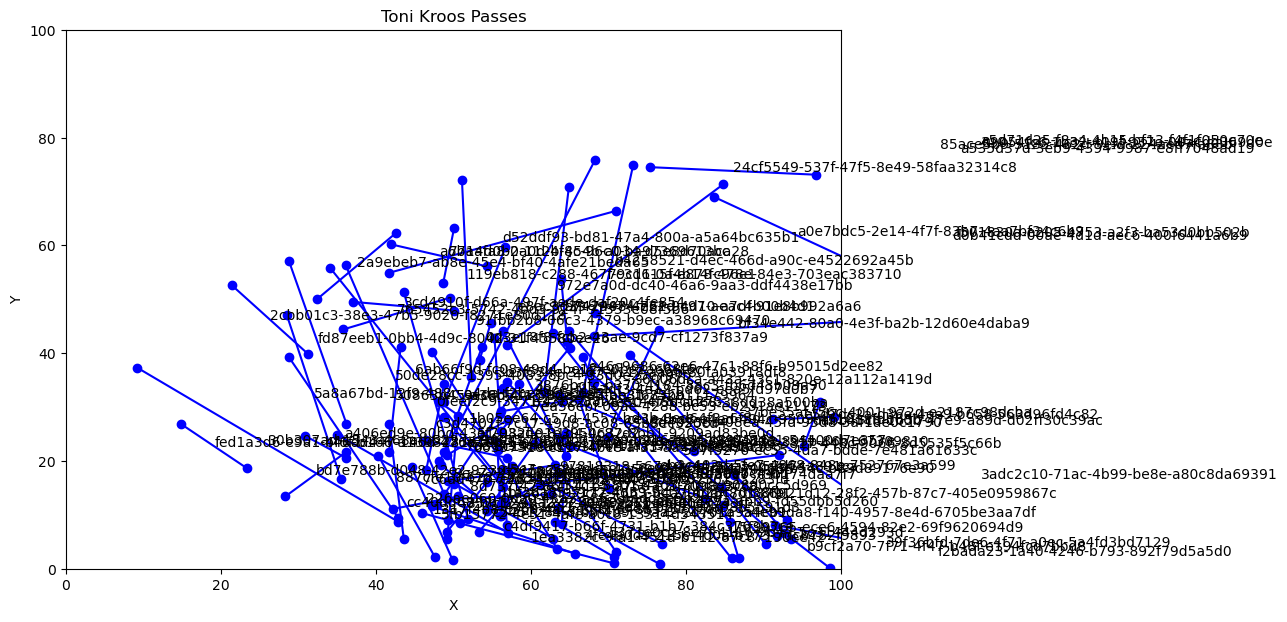

In [78]:
fig, ax = plt.subplots(figsize=(10, 7))

# Set the pitch dimensions (x: 0 to 100, y: 0 to 100)
plt.xlim(0, 100)
plt.ylim(0, 100)

# Plot each pass made by Toni Kroos
for pass_event in tk_passes:
    start_x, start_y = pass_event['location']
    end_x, end_y = pass_event['pass']['end_location']
    
    # Plot the pass with a line
    plt.plot([start_x, end_x], [start_y, end_y], marker='o', color='blue')

    # Annotate the pass with the pass event ID (or other relevant info)
    plt.text((start_x + end_x) / 2, (start_y + end_y) / 2, str(pass_event['id']), color='black')

# Customize plot labels and title (modify as needed)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Toni Kroos Passes')

# Show the plot
plt.show()

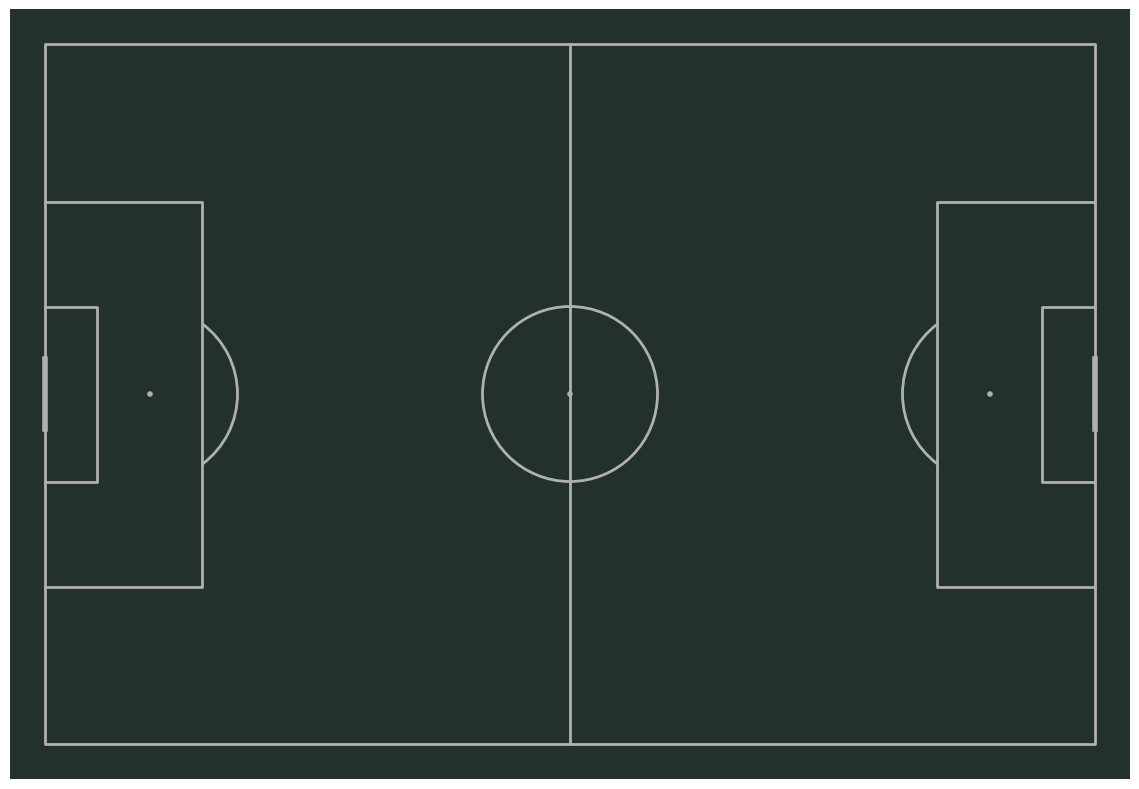

In [84]:
## set up pitch
p = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_zorder=50 )
fig, ax = p.draw(figsize=(12,8))

In [ ]:
len(tk_passes)

In [74]:
# Function to plot the football pitch lines and markings
def plot_pitch_with_passes(pass_events):
    
    fig, ax = plt.subplots(figsize=(12, 8))

    # Pitch dimensions and center
    pitch_length = 120  # Adjust as needed
    pitch_width = 80  # Adjust as needed
    pitch_center = (60, 40)  # Custom pitch center

    # Plot pitch outline
    plt.plot([pitch_center[0] - pitch_length / 2, pitch_center[0] - pitch_length / 2],
             [pitch_center[1] - pitch_width / 2, pitch_center[1] + pitch_width / 2], color="black")
    plt.plot([pitch_center[0] - pitch_length / 2, pitch_center[0] + pitch_length / 2],
             [pitch_center[1] + pitch_width / 2, pitch_center[1] + pitch_width / 2], color="black")
    plt.plot([pitch_center[0] + pitch_length / 2, pitch_center[0] + pitch_length / 2],
             [pitch_center[1] + pitch_width / 2, pitch_center[1] - pitch_width / 2], color="black")
    plt.plot([pitch_center[0] + pitch_length / 2, pitch_center[0] - pitch_length / 2],
             [pitch_center[1] - pitch_width / 2, pitch_center[1] - pitch_width / 2], color="black")

    # Plot center circle
    centreCircle = plt.Circle(pitch_center, 9.15, color="black", fill=False)
    ax.add_patch(centreCircle)
    
    # Draw Circles
    ax.add_patch(centreCircle)
    for pass_event in pass_events:
        if pass_event.get('period') == 1:
            start_x, start_y = pass_event['location']
            end_x, end_y = pass_event['pass']['end_location']
            start_x += pitch_center[0] - 50
            start_y += pitch_center[1] - 40
            end_x += pitch_center[0] - 50
            end_y += pitch_center[1] - 40

            # Calculate arrow direction
            arrow_dx = end_x - start_x
            arrow_dy = end_y - start_y

            # Plot arrow representing the pass direction
            plt.arrow(start_x, start_y, arrow_dx, arrow_dy, head_width=1.5, head_length=1.5, color='blue')
            # Annotate the pass with the pass event ID (or other relevant info)
            #plt.text((start_x + end_x) / 2, (start_y + end_y) / 2, str(pass_event['id']), color='black')

    # Add legend
    plt.text(pitch_center[0] - 15, pitch_center[1] + pitch_width / 2 - 3, 'Toni Kroos Passes - First Half', color='black', fontsize=12)
    plt.arrow(pitch_center[0] - 8, pitch_center[1] + pitch_width / 2 - 6, 5, 0, head_width=1.5, head_length=1.5, color='blue')
    plt.text(pitch_center[0] + 1, pitch_center[1] + pitch_width / 2 - 6, 'Pass', color='black', fontsize=10)

    # Set plot limits and show
    plt.xlim(pitch_center[0] - pitch_length / 2, pitch_center[0] + pitch_length / 2)
    plt.ylim(pitch_center[1] - pitch_width / 2, pitch_center[1] + pitch_width / 2)
    plt.axis('off')  # Hide axes
    plt.show()

# Call the function to plot the pitch
plot_pitch_with_passes(tk_passes)

NameError: name 'tk_passes' is not defined

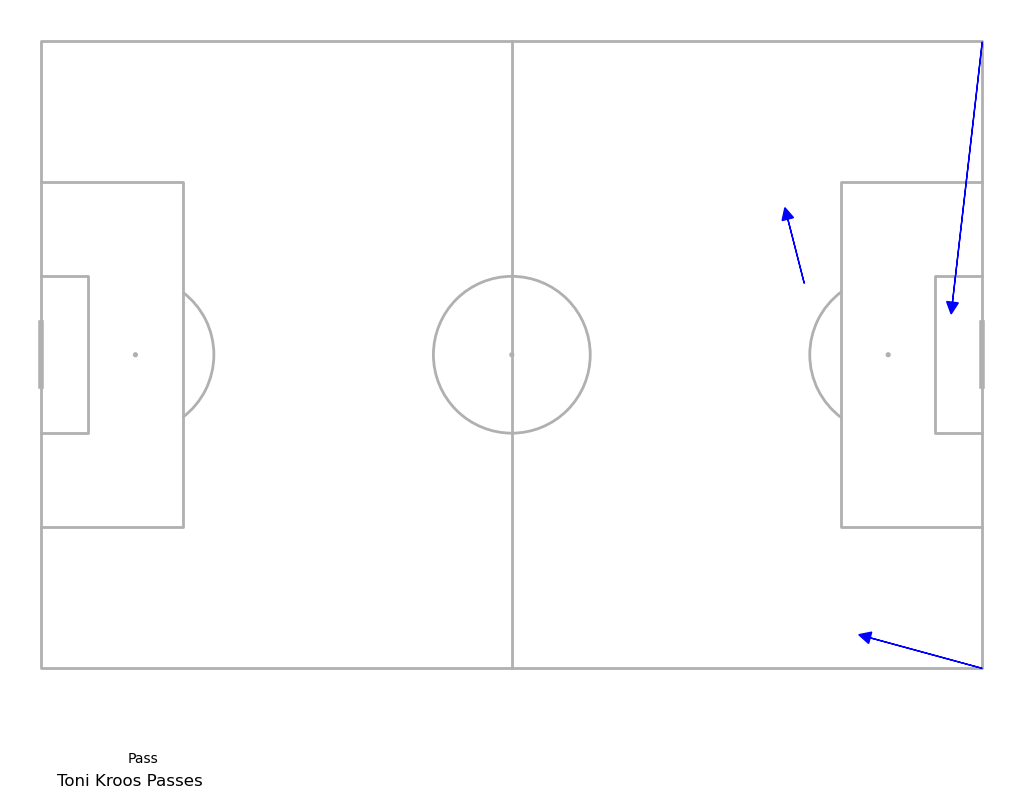

In [79]:
# Function to plot the football pitch lines and markings
def plot_pitch_with_passes(pass_events):
    p = Pitch(pitch_type='statsbomb')
    fig, ax = p.draw(figsize=(12,8))
    # Draw Circles
    
    for pass_event in pass_events:
        if pass_event.get('period') == 1:
            if pass_event.get('play_pattern', {}).get('name') == "From Corner":
                start_x, start_y = pass_event['location']
                end_x, end_y = pass_event['pass']['end_location']
                # Calculate arrow direction
                arrow_dx = end_x - start_x
                arrow_dy = end_y - start_y

                # Plot the pass with a line
                #plt.plot([start_x, end_x], [start_y, end_y], marker='o', color='blue')
                plt.arrow(start_x, start_y, arrow_dx, arrow_dy, head_width=1.5, head_length=1.5, color='blue')
                # Annotate the pass with the pass event ID (or other relevant info)
                #plt.text((start_x + end_x) / 2, (start_y + end_y) / 2, str(pass_event['id']), color='black')

    # Add legend
    plt.text(2, 95, 'Toni Kroos Passes', color='black', fontsize=12)
    plt.plot([5, 10], [92, 92], color='blue')  # Line for legend
    plt.text(11, 92, 'Pass', color='black', fontsize=10)

    # Set plot limits and show
  
    plt.axis('off')  # Hide axes
    plt.show()

# Call the function to plot the pitch
plot_pitch_with_passes(tk_passes)

In [ ]:
corner = [event for event in tk_passes if event.get('play_pattern', {}).get('name') == 'From Corner']

In [ ]:
corner

In [ ]:
[event for event in event_data if event.get('id') == 'adacfc98-5402-4b21-bee1-723f6e8e84ce']

In [ ]:
outliers = [cor.get('location') for cor in corner]

In [ ]:
outliers

In [ ]:
goals = [event for event in match_events if event["shot"]["outcome"] == {'id': 97, 'name': 'Goal'}]

In [ ]:
goals

In [ ]:
# Extracting players and counting their passes
player_pass_count = Counter(event['player']['name'] for event in match_events)

In [ ]:
648 + 351

In [ ]:
player_pass_count

In [ ]:
# Getting the top 5 players with the most passes
top_5_players_most_passes = player_pass_count.most_common(5)


In [ ]:
top_5_players_most_passes

In [ ]:

# Getting the top 5 players with the most passes
top_5_players_most_passes = player_pass_count.most_common(5)

# Getting the 5 players with the least passes
players_least_passes = player_pass_count.most_common()[-5:]

print("Top 5 players with the most passes:")
for player, passes in top_5_players_most_passes:
    print(f"{player}: {passes} passes")

print("\n5 players with the least passes:")
for player, passes in players_least_passes:
    print(f"{player}: {passes} passes")

In [ ]:
if match_events:
    # Create a DataFrame from events related to the desired match ID and append to the list
    event_df = pd.DataFrame(match_events)
    event_dfs.append(event_df)

# Concatenate all event DataFrames into a single DataFrame
events_df = pd.concat(event_dfs, ignore_index=True)

# Display the DataFrame
print(events_df.head())